In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None #set the max display columns
np.set_printoptions(threshold=np.inf) # unfold the display result of array

# Feature Engieering

In [93]:
data = pd.read_csv('D:\\loan_profit_data\\LoanStats3a.csv',skiprows = 1)

In [94]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.70%,9.0,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62,NaN,Nov-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.40%,4.0,f,0.00,0.00,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66,NaN,Oct-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.50%,10.0,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91,NaN,Nov-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21%,37.0,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### step 1: Delete shit feature.

In [95]:
def del_singlevalue_col(df):
    """delete the features that have only one values"""
    col_list = []
    for col in df.columns.tolist():
        if len(df[col].value_counts()) == 1:
            col_list.append(col)
            df.drop(col,axis = 1,inplace = True)
    # return col_list

def del_lotsnull_col(df,threshold):
    """delete the features those null value ratio is bigger than threshold"""
    col_list = []
    for col in df.columns.tolist():
        if df[col].isnull().sum()/len(df) >= threshold:
            col_list.append(col)
    df.drop(col_list,axis = 1,inplace = True)
    # return col_list

In [96]:
del_singlevalue_col(data)
del_lotsnull_col(data,threshold = 0.5)

In [97]:
data.shape

(39535, 46)

### step2: Delete useless features

Now our data set still have lots of features, meanwhile some of them are of none value for our model traing, such as __zip_code__,__member_id__ and so on. In other hands, some of the features make less contribution to our model, we delete them for model clearna.

In [98]:
drop_col = []
# delete choas and useless features
drop_col.extend(['url','desc',"id", "member_id", "funded_amnt", "funded_amnt_inv",
                "grade", "sub_grade", "emp_title", "issue_d"]) 
drop_col.extend(["zip_code", "out_prncp", "out_prncp_inv", "total_pymnt",
                "total_pymnt_inv", "total_rec_prncp"])
drop_col.extend(["total_rec_int", "total_rec_late_fee", "recoveries",
                "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt"])
print(len(drop_col))
try:
    data.drop(drop_col,axis = 1,inplace = True)
except:
    pass

print(data.shape)

22
(39535, 24)


In [99]:
(data.isnull().sum(axis = 0 )/len(data)).sort_values(ascending = False)

emp_length              0.027368
pub_rec_bankruptcies    0.011458
revol_util              0.001366
title                   0.000379
last_credit_pull_d      0.000126
revol_bal               0.000101
loan_status             0.000101
term                    0.000101
int_rate                0.000101
installment             0.000101
total_acc               0.000101
home_ownership          0.000101
annual_inc              0.000101
verification_status     0.000101
pymnt_plan              0.000101
pub_rec                 0.000101
purpose                 0.000101
addr_state              0.000101
dti                     0.000101
delinq_2yrs             0.000101
earliest_cr_line        0.000101
inq_last_6mths          0.000101
open_acc                0.000101
loan_amnt               0.000101
dtype: float64

Well, since the persentage of null values is a little bit small, we just drop the rows contains null values.

In [100]:
data.dropna(axis = 0,inplace = True)

In [101]:
data.shape

(37946, 24)

In [102]:
#import pandas_profiling as pp

#pp.ProfileReport(data)

### step3: Confirm the label feature.

In [103]:
data.loan_status.value_counts()

Fully Paid            32434
Charged Off            5291
Current                 196
Late (31-120 days)       10
In Grace Period           9
Late (16-30 days)         5
Default                   1
Name: loan_status, dtype: int64

In [104]:
data = data[(data.loan_status == 'Fully Paid' )|( data.loan_status == 'Charged Off')]
data.index = np.arange(len(data))

In [105]:
y = np.where(data.loan_status == 'Charged Off',0,1)

data['loan_status'] = y

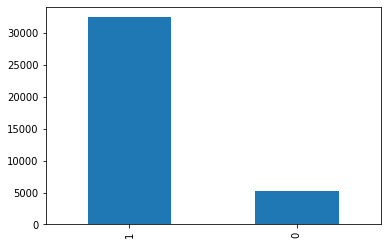

In [106]:
pd.Series(y).value_counts().plot(kind = 'bar')

In [107]:
data.iloc[0][:]

loan_amnt                      5000
term                      36 months
int_rate                     10.65%
installment                  162.87
emp_length                10+ years
home_ownership                 RENT
annual_inc                    24000
verification_status        Verified
loan_status                       1
pymnt_plan                        n
purpose                 credit_card
title                      Computer
addr_state                       AZ
dti                           27.65
delinq_2yrs                       0
earliest_cr_line             Jan-85
inq_last_6mths                    1
open_acc                          3
pub_rec                           0
revol_bal                     13648
revol_util                   83.70%
total_acc                         9
last_credit_pull_d           Nov-16
pub_rec_bankruptcies              0
Name: 0, dtype: object

### step4: Encoding object features

In [108]:
def find_object_col(df):
    l = []
    for each in df:
        if df[each].dtype == 'object':
            l.append(each)
    return l
# object_columns_df = data.select_dtypes(include=["object"]) 

def label_encoder_rule(df,feature):
    return pd.Series(index = data[feature].unique(),
                     data = np.arange(len(data[feature].unique()))).to_dict()
    
    
def label_encode(df,col_list):
    for each in col_list:
        replace_rule = label_encoder_rule(df,each)
        df[each].replace(replace_rule,inplace = True)
    return df

def one_hot_encoder(df,col_list):
    for each in col_list:
        new_col = pd.get_dummies(df[each],prefix = each)
        df = pd.concat([df.drop([each],axis = 1),new_col],axis = 1)
    return df


From the usage and test of those def-funcion, we found that the sentence'**data.function(sett,inplace = True)** seems doesn't work...

In [109]:
pd.Series(index = find_object_col(data),
          data = [len(data[x].value_counts()) for x in find_object_col(data)]).sort_values(ascending = False)

title                  18666
revol_util              1087
earliest_cr_line         514
int_rate                 332
last_credit_pull_d       103
addr_state                48
purpose                   14
emp_length                11
home_ownership             4
verification_status        3
pymnt_plan                 2
term                       2
dtype: int64

In [110]:
# processing specificly

drop_col = ["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"]
as_floats_col = ['int_rate','revol_util']
get_dum_col = ['purpose', 
       'home_ownership', 'verification_status', 'pymnt_plan', 'term']
label_enco_col = ['emp_length']

try:
    data.drop(drop_col, axis=1,inplace = True)
except:
    pass


for each in as_floats_col:
    data[each] = data[each].str.rstrip('%').astype('float')

    
label_rule = label_encoder_rule(data,feature = 'emp_length')
label_encode(data,label_enco_col)


data = one_hot_encoder(data,get_dum_col)  

In [111]:
data

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,term_ 36 months,term_ 60 months
0,5000.0,10.65,162.87,0,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0
1,2500.0,15.27,59.83,1,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1
2,2400.0,15.96,84.33,0,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0
3,10000.0,13.49,339.31,0,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0
4,5000.0,7.90,156.46,2,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37720,14400.0,9.51,461.35,0,88068.0,1,9.96,0.0,0.0,10.0,1.0,4765.0,16.5,32.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
37721,2150.0,10.78,70.17,0,11029.0,0,19.15,0.0,2.0,4.0,1.0,1.0,0.2,8.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0
37722,4000.0,12.36,133.55,7,50000.0,0,8.66,0.0,1.0,13.0,1.0,9380.0,44.1,24.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0
37723,9400.0,13.30,318.09,4,50000.0,1,17.04,0.0,3.0,9.0,1.0,5181.0,97.8,41.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0


### step5: Standardize process

In [112]:
from sklearn.preprocessing import StandardScaler

def df_scaler(df,scaler_col):
    df.index = np.arange(len(df)) # if dont do this, the next operation will add null valus to df.
    scaler = StandardScaler()
    m = scaler.fit_transform(df[scaler_col])
    df = pd.concat([df.drop(scaler_col,axis = 1),pd.DataFrame(m,columns = scaler_col)],axis = 1)
    return df

In [113]:
standard_col = ['loan_amnt','int_rate','installment',
                'annual_inc','dti','revol_bal','revol_util','total_acc']

data = df_scaler(data,standard_col) #maybe I should use other better and simple ways to standardized.

In [114]:
data

,emp_length,loan_status,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,pub_rec_bankruptcies,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pymnt_plan_n,pymnt_plan_y,term_ 36 months,term_ 60 months,loan_amnt,int_rate,installment,annual_inc,dti,revol_bal,revol_util,total_acc
0,0,1,0.0,1.0,3.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,-0.843867,-0.377693,-0.783418,-0.716369,2.145617,0.012056,1.224654,-1.157593
1,1,0,0.0,5.0,3.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,-1.178870,0.861881,-1.276286,-0.622180,-1.858279,-0.740662,-1.402424,-1.596442
2,0,1,0.0,2.0,2.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,-1.192270,1.047012,-1.159096,-0.900791,-0.698426,-0.660802,1.747948,-1.069823
3,0,1,0.0,1.0,10.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,-0.173862,0.384296,0.060541,-0.320776,0.996281,-0.494539,-0.992275,1.299960
4,2,1,0.0,3.0,9.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,-0.843867,-1.115535,-0.814079,-0.527991,-0.325831,-0.345707,-0.734163,-0.894284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37720,0,1,0.0,0.0,10.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0.415743,-0.683562,0.644291,0.289381,-0.512128,-0.546960,-1.151384,0.861112
37721,0,0,0.0,2.0,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,-1.225770,-0.342813,-1.226827,-0.919990,0.868577,-0.846763,-1.727715,-1.245363
37722,7,0,0.0,1.0,13.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,-0.977868,0.081110,-0.923663,-0.308217,-0.707440,-0.256534,-0.175511,0.158953
37723,4,1,0.0,3.0,9.0,1.0,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,-0.254263,0.333318,-0.040960,-0.308217,0.551571,-0.520781,1.723198,1.651040


# LogitsitcRegression

In [115]:
data.loan_status.value_counts()

1    32434
0     5291
Name: loan_status, dtype: int64

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = data.drop(['loan_status'],axis = 1).as_matrix()
y = data.loan_status.values

xta,xts,yta,yts = train_test_split(x,y,random_state = 23,test_size = 0.2)
    
lr = LogisticRegression(C = 100)
lr.fit(xta,yta)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [142]:
def score(model):
    print('test_score:',model.score(xts,yts))
    print('train_score:',model.score(xta,yta))

score(lr)

test_score: 0.8512922465208748
train_score: 0.8617296222664016


# Applying Condation

Well, in the reality condation, the assumation is more complex and the result is need to be reprocessed. For some condations, a successful predict for customers' pay bill on time could bring a little profit for bank. But if the prediction is wrong, which means loan to a people who can't pay the bill on time, bank will lost a lot of money. That is unforgivable. So we should focus on the **true positive ratio** and **preicise ratio**.

In [123]:
# test procedure:

yts_pre = lr.predict(xts)

test_result = pd.DataFrame({'yts_t':yts,'yts_p':yts_pre},index = np.arange(len(yts)))

In [187]:
def cal_ratio(model,input_data,real_data,values_list):
    """calculate the special ratio for the predict values and real values compilation"""
    length = len(input_data)
    target_num = 0
    for each in range(length):
        if model.predict([input_data[each]]) == values_list[0] and real_data[each] == values_list[1]:
            target_num += 1
    return target_num

def evaluate_ratio(model,input_data,real_data,):
    """evaluate for predict condations and ratio ossociated."""
    tp = cal_ratio(model,input_data,real_data,[1,1])
    fp = cal_ratio(model,input_data,real_data,[1,0])
    tn = cal_ratio(model,input_data,real_data,[0,0])
    fn = cal_ratio(model,input_data,real_data,[0,1])

   
    print('TP :',tp)
    print('FP :',fp)
    print('TN :',tn)
    print('FN :',fn)

    print('tpr =',tp / float((tp + fn)))
    print('fpr =',fp / float((fp + tn)))
    
    
    return (tp / float((tp + fn)),fp / float((fp + tn)))

In [188]:
evaluate_ratio(lr,xts,yts)

TP : 6416
FP : 1102
TN : 7
FN : 20
tpr = 0.9968924798011187
fpr = 0.9936880072137061


(0.9968924798011187, 0.9936880072137061)

Since we have ruled that **Charged off** is **0**, **paied off** is **1**. So the high **tpr** and **fpr** presents that our model tends to predict all sample to positive, whicn means every person comes for loan will be evaluated that they have ability for paying the bill. Then our model becomes valueless. The reason for model trending might be that the origenal data set is unbalenced among positive sample and negtive sample. So we should balence the sample distribute.

In [190]:
# class_weight setting to balance
llr = LogisticRegression(C = 100,class_weight="balanced")
llr.fit(xta,yta)

evaluate_ratio(llr,xts,yts)

score(llr)

TP : 4198
FP : 433
TN : 676
FN : 2238
tpr = 0.6522684897451834
fpr = 0.3904418394950406
test_score: 0.6459907223326706
train_score: 0.6574552683896621


In [155]:
print(pd.Series(y).value_counts())
print(y.sum()/len(y))

1    32434
0     5291
dtype: int64
0.8597481776010603


In [189]:
# class_weight setting to mauual weight.

penalty = {
    0: 1,
    1: 4
}

lllr = LogisticRegression(C = 100,class_weight=penalty) # class_weight setting.
lllr.fit(xta,yta)

evaluate_ratio(lllr,xts,yts)

score(lllr)

TP : 6436
FP : 1109
TN : 0
FN : 0
tpr = 1.0
fpr = 1.0
test_score: 0.8530152418820411
train_score: 0.8614314115308151


But new problem appeard, when we adjust the tpr/fpr to a better value, the precise ratio (model score) become lower, which means that we scarifice the score for a better model predict trending. Maybe we can find a best point to balence two side:

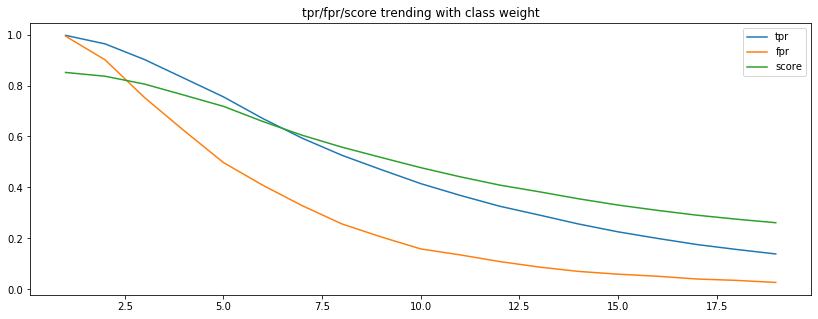

In [181]:
plt.figure(figsize = (14,5))

tpr_l = []
fpr_l = []
score_l = []

for i in range(1,20):
    lrr = LogisticRegression(C = 100,class_weight={0:i,1:1})
    lrr.fit(xta,yta)
    tpr_l.append(evaluate_ratio(lrr,xts,yts)[0])
    fpr_l.append(evaluate_ratio(lrr,xts,yts)[1])
    score_l.append(lrr.score(xts,yts))

plt.plot(np.arange(1,20),tpr_l,label = 'tpr')
plt.plot(np.arange(1,20),fpr_l,label = 'fpr')
plt.plot(np.arange(1,20),score_l,label = 'score')
plt.title('tpr/fpr/score trending with class weight')
plt.legend()
plt.show()

With the increase of i(sample:{0:1 = **i**:1}),the tpr/fpr/score are all decrese. But for our goal, it will be better if the differentials between fpr and tpr are smaller, which is the same to score.
So we create a evaluate function such as **R**, set the right weight. And figuring them.

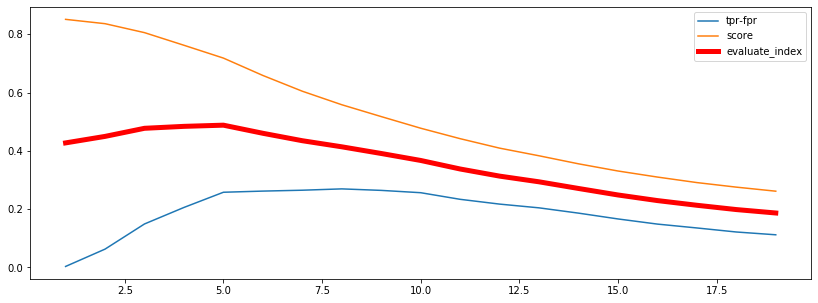

In [193]:
plt.figure(figsize = (14,5))
plt.plot(np.arange(1,20),[tpr_l[i]-fpr_l[i] for i in range(len(tpr_l))],label = 'tpr-fpr')
plt.plot(np.arange(1,20),score_l,label = 'score')

# R  = 0.5 * (tpr - fpr) + 0.5 * score.
R = [0.5*[tpr_l[i]-fpr_l[i] for i in range(len(tpr_l))][i]+0.5*score_l[i] for i in range(len(tpr_l))]

plt.plot(np.arange(1,20),R,label = 'evaluate_index',linewidth = 5,color = 'red')
plt.legend()
plt.show()

### 'i = 5' is the best choice!

From the figure we can conclude that the best share of class wight is  **{0:1 = 5:1}**. We got it!